In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import linregress

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
Happiness_finance = pd.read_csv("Resources/Happiness_finance_final2.csv")
pollution = pd.read_csv("Resources/pollution_index.csv")

In [4]:
Happiness_pollution= pd.merge(Happiness_finance, pollution, on='Country', how='left')
Happiness_pollution.head()

,Unnamed: 0,Country,Country Code,Region,Happiness Ranking,Happiness Score,Gross GDP 2015,Unemployment Rate 2015(%),GDP Per Capita 2015(USD),Gross GDP 2015(USD Billion),GDP Per Capita 2015(USD in thousands),Pollution Index
0,0,Switzerland,CHE,Western Europe,1,7.59,679289166858.24,4.80,82510.41,679.29,82.51,24.07
1,1,Iceland,ISL,Western Europe,2,7.56,16942247373.97,3.98,52158.36,16.94,52.16,13.78
2,2,Denmark,DNK,Western Europe,3,7.53,301298464861.39,6.17,53235.65,301.30,53.24,31.79
3,3,Norway,NOR,Western Europe,4,7.52,386663139402.71,4.30,74280.67,386.66,74.28,23.70
4,4,Canada,CAN,North America,5,7.43,1559623393038.66,6.91,43559.73,"1,559.62",43.56,27.30


In [5]:
Happiness_pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 12 columns):
Unnamed: 0                                136 non-null int64
Country                                   136 non-null object
Country Code                              136 non-null object
Region                                    136 non-null object
Happiness Ranking                         136 non-null int64
Happiness Score                           136 non-null float64
Gross GDP 2015                            136 non-null float64
Unemployment Rate 2015(%)                 136 non-null float64
GDP Per Capita 2015(USD)                  136 non-null float64
Gross GDP 2015(USD Billion)               136 non-null object
GDP Per Capita 2015(USD in thousands)     136 non-null float64
Pollution Index                           107 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 13.8+ KB


In [6]:
Happiness_pollution = Happiness_pollution.dropna()
Happiness_pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 131
Data columns (total 12 columns):
Unnamed: 0                                107 non-null int64
Country                                   107 non-null object
Country Code                              107 non-null object
Region                                    107 non-null object
Happiness Ranking                         107 non-null int64
Happiness Score                           107 non-null float64
Gross GDP 2015                            107 non-null float64
Unemployment Rate 2015(%)                 107 non-null float64
GDP Per Capita 2015(USD)                  107 non-null float64
Gross GDP 2015(USD Billion)               107 non-null object
GDP Per Capita 2015(USD in thousands)     107 non-null float64
Pollution Index                           107 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 10.9+ KB


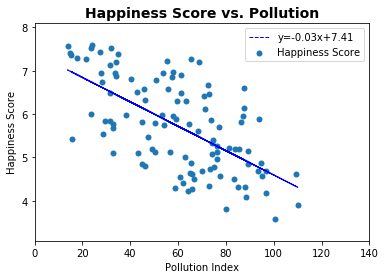

In [7]:
pollution = Happiness_pollution["Pollution Index"]
x_axis = pollution

#(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
(slope_pollution, intercept_pollution, r_pollution , p_pollution, se_pollution) = linregress(x_axis,Happiness_pollution["Happiness Score"] )
fit_pollution = slope_pollution * x_axis + intercept_pollution

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Happiness Score vs. Pollution", fontsize=14, fontweight="bold")

plt.xlim(0,140)
      
plt.ylim(min(Happiness_pollution["Happiness Score"]-0.5),max(Happiness_pollution["Happiness Score"])+0.5)
plt.scatter(x_axis,Happiness_pollution["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis, fit_pollution,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_pollution,intercept_pollution))

plt.ylabel("Happiness Score")
plt.xlabel("Pollution Index")
plt.legend()



In [8]:
print(r_pollution , p_pollution, se_pollution)


-0.6313439197131803 3.0930250006557106e-13 0.0033675150199638125
